### Import Necessary Libs

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

### Load Sample Data

In [2]:
data_dir = 'sample_data/images'
sample_data = os.listdir(data_dir)
sample_data.sort(key=len)
sample_data

['2.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg']

In [3]:
img_files = [mpimg.imread(os.path.join(data_dir, file)) for file in sample_data]
img_files

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

### Exploring data at surface

In [4]:
for i in img_files:
    print(np.shape(i))

(514, 652, 3)
(514, 648, 3)
(514, 648, 3)
(514, 652, 3)
(514, 652, 3)
(514, 632, 3)
(514, 656, 3)


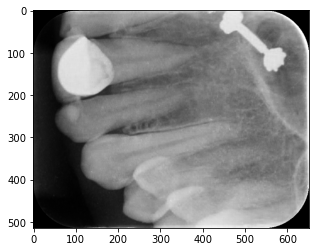

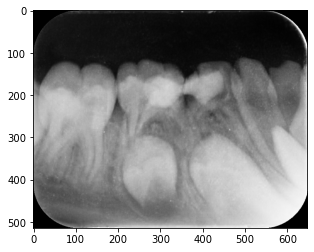

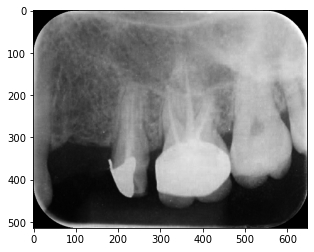

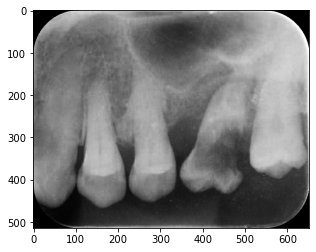

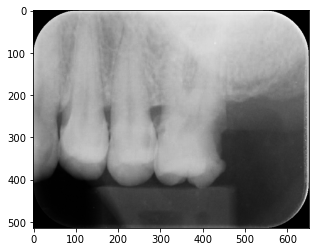

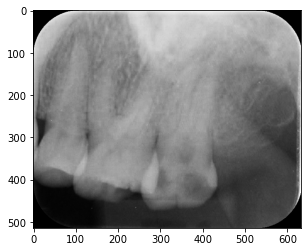

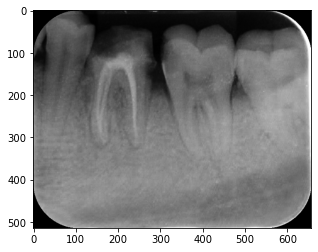

In [5]:
for i in img_files:
    plt.figure()
    plt.imshow(i)

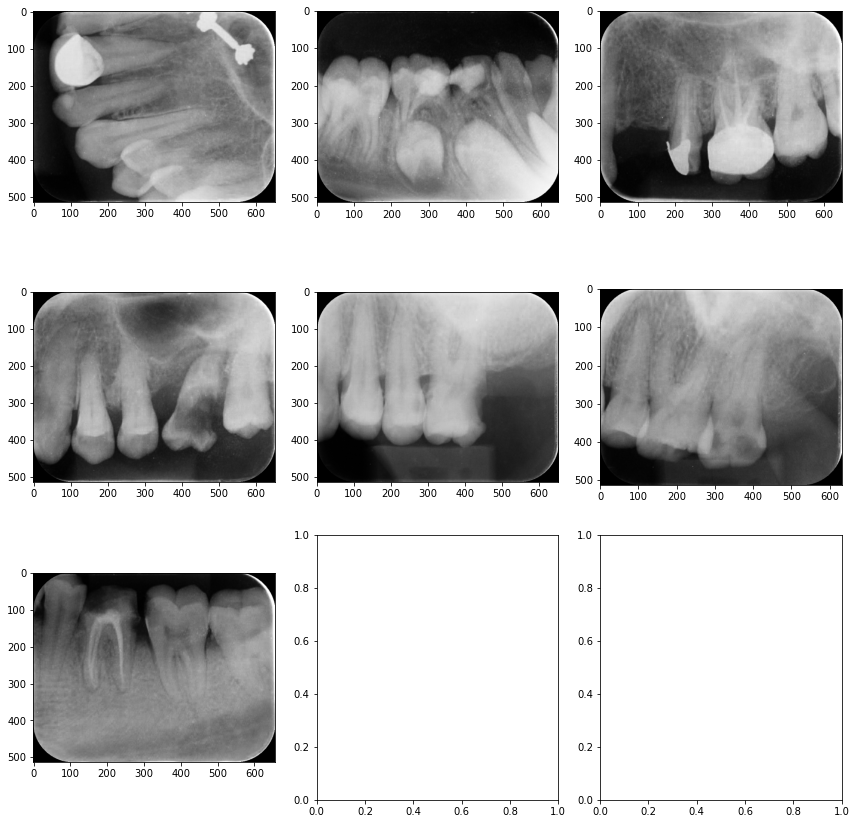

In [6]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
axs[0,0].imshow(img_files[0])
axs[0,1].imshow(img_files[1])
axs[0,2].imshow(img_files[2])
axs[1,0].imshow(img_files[3])
axs[1,1].imshow(img_files[4])
axs[1,2].imshow(img_files[5])
axs[2,0].imshow(img_files[6])
fig.tight_layout()

### Applying pseudocolor schemes to image plots
Pseudocolor can be a useful tool for enhancing contrast and visualizing your data more easily. Pseudocolor is only relevant to single-channel, grayscale, luminosity images.

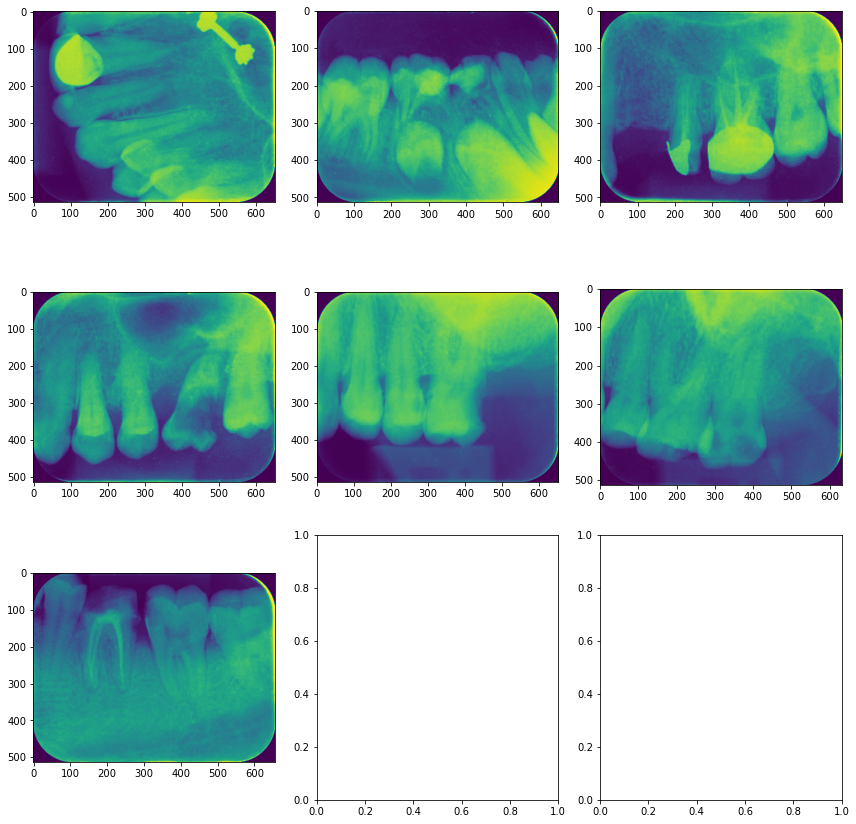

In [7]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
axs[0,0].imshow(img_files[0][:,:,0])
axs[0,1].imshow(img_files[1][:,:,0])
axs[0,2].imshow(img_files[2][:,:,0])
axs[1,0].imshow(img_files[3][:,:,0])
axs[1,1].imshow(img_files[4][:,:,0])
axs[1,2].imshow(img_files[5][:,:,0])
axs[2,0].imshow(img_files[6][:,:,0])
fig.tight_layout()

### Adding a colormap for better visualisation

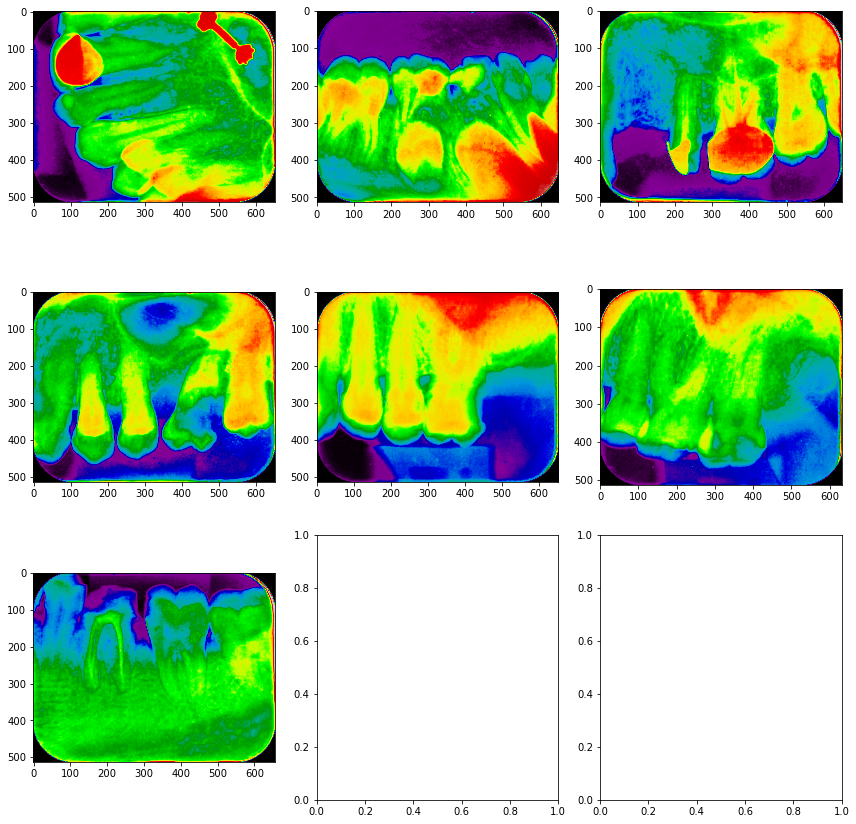

In [8]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
axs[0,0].imshow(img_files[0][:,:,0]).set_cmap('nipy_spectral')
axs[0,1].imshow(img_files[1][:,:,0]).set_cmap('nipy_spectral')
axs[0,2].imshow(img_files[2][:,:,0]).set_cmap('nipy_spectral')
axs[1,0].imshow(img_files[3][:,:,0]).set_cmap('nipy_spectral')
axs[1,1].imshow(img_files[4][:,:,0]).set_cmap('nipy_spectral')
axs[1,2].imshow(img_files[5][:,:,0]).set_cmap('nipy_spectral')
axs[2,0].imshow(img_files[6][:,:,0]).set_cmap('nipy_spectral')
fig.tight_layout()

### Here I am resizing the image to apply different interpolation

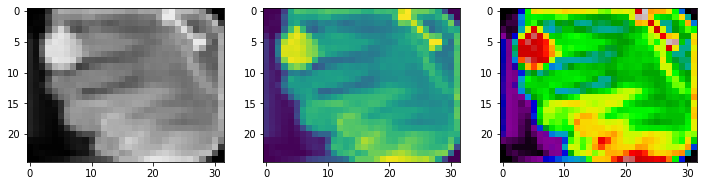

In [9]:
from PIL import Image
img = Image.open(os.path.join(data_dir, sample_data[0]))
img.thumbnail((32, 32), Image.ANTIALIAS)  # resizes image in-place
img_array = np.array(img)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,12))
ax1.imshow(img)
ax2.imshow(img_array[:, :, 0])
ax3.imshow(img_array[:, :, 0]).set_cmap('nipy_spectral')

### Array Interpolation schemes
Interpolation calculates what the color or value of a pixel "should" be, according to different mathematical schemes. One common place that this happens is when you resize an image. The number of pixels change, but you want the same information. Since pixels are discrete, there's missing space. Interpolation is how you fill that space. This is why your images sometimes come out looking pixelated when you blow them up. The effect is more pronounced when the difference between the original image and the expanded image is greater. Let's take our image and shrink it. We're effectively discarding pixels, only keeping a select few. Now when we plot it, that data gets blown up to the size on your screen. The old pixels aren't there anymore, and the computer has to draw in pixels to fill that space. We'll use the Pillow library that we used to load the image also to resize the image

In [10]:
interpolation = ['none', 'antialiased', 'nearest', 'bilinear', 'bicubic', 'spline16', 
                 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 
                 'bessel', 'mitchell', 'sinc', 'lanczos']
len(interpolation)

18

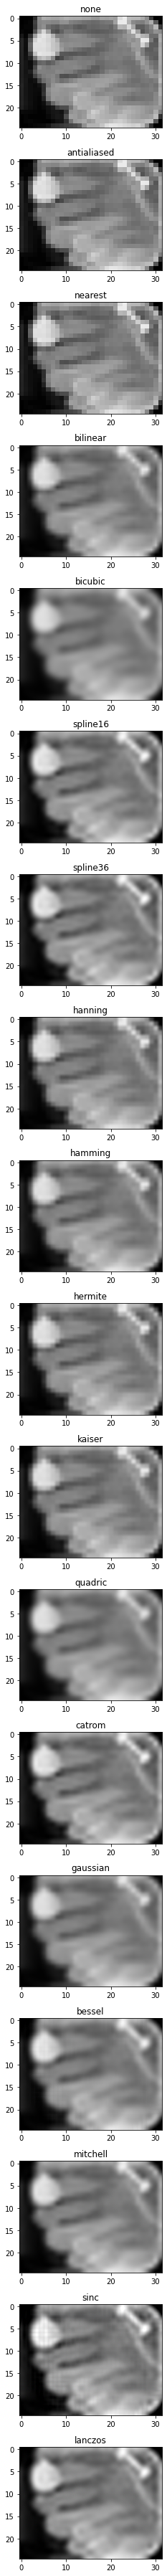

In [16]:
fig, axs = plt.subplots(18,1, figsize=(50,50))
axs = axs.ravel()
for i in range(len(interpolation)):
    axs[i].imshow(img, interpolation=interpolation[i])
    axs[i].set_title(interpolation[i])
fig.tight_layout()

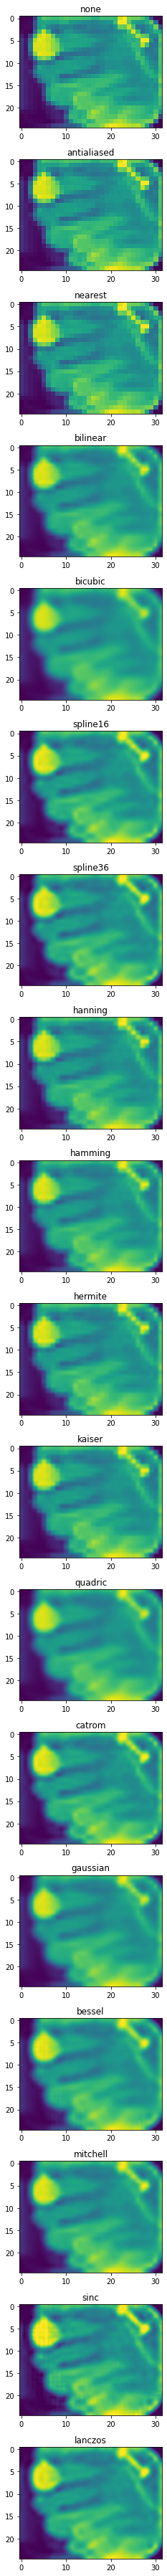

In [12]:
fig, axs = plt.subplots(18,1, figsize=(50,50))
axs = axs.ravel()
for i in range(len(interpolation)):
    axs[i].imshow(img_array[:, :, 0], interpolation=interpolation[i])
    axs[i].set_title(interpolation[i])
fig.tight_layout()

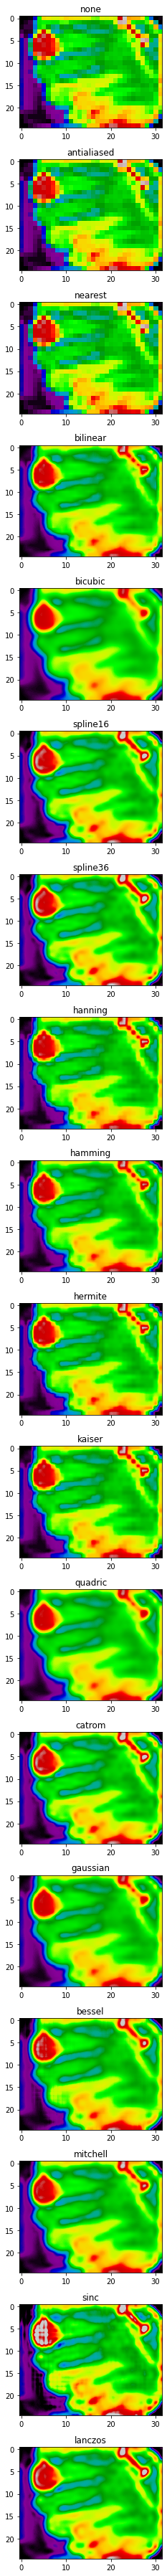

In [14]:
fig, axs = plt.subplots(18,1, figsize=(50,50))
axs = axs.ravel()
for i in range(len(interpolation)):
    axs[i].imshow(img_array[:, :, 0], interpolation=interpolation[i]).set_cmap('nipy_spectral')
    axs[i].set_title(interpolation[i])
fig.tight_layout()

### Feature Extraction using scikit-image

In [17]:
import skimage
from skimage import io

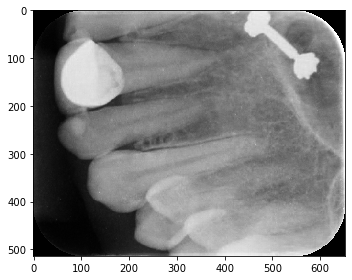

In [21]:
sample_img = mpimg.imread(os.path.join(data_dir, '2.jpg'))
io.imshow(sample_img)
plt.show()

In [23]:
sample_img.shape

(514, 652, 3)

### Converting 3d img to 2d img

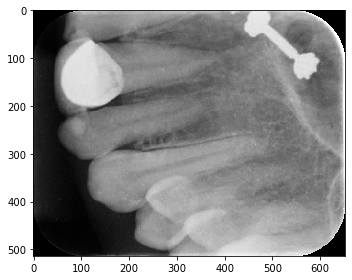

In [25]:
from skimage import color 
grayscale = color.rgb2gray(sample_img) 

io.imshow(grayscale)
plt.show()

In [26]:
grayscale.shape

(514, 652)

### Feature Extraction: Grayscale Pixel Values

In [28]:
features = np.reshape(grayscale, (514, 652))
features.shape, features

((514, 652),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

### Thresholding
Thresholding is a technique used to partition an image into its foreground and background. This is the simplest method of image segmentation in which a cut-off is applied to the image pixel values to segment the background.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


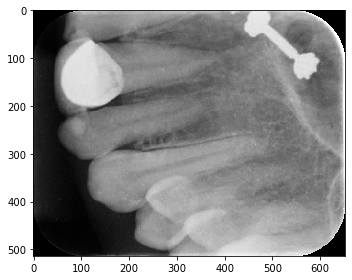

In [31]:
print(grayscale)
io.imshow(grayscale)
plt.show()

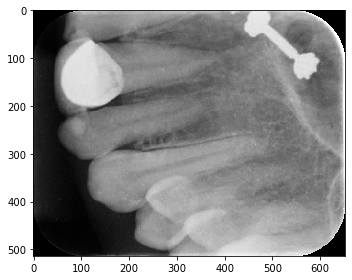

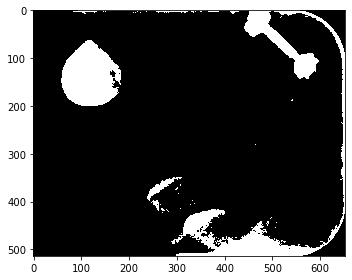

In [53]:
threshold_value = 0.72
crown_threholded = grayscale > threshold_value 
 
# Show the original image
io.imshow(grayscale)
plt.show()

# Show the thresholded image
io.imshow(crown_threholded)
plt.show()

Instead of an arbitrary threshold value, you can use the Otsu method, which uses a simple heuristic method for finding the optimal threshold.

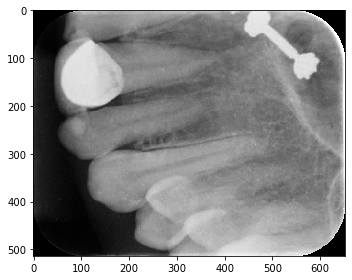

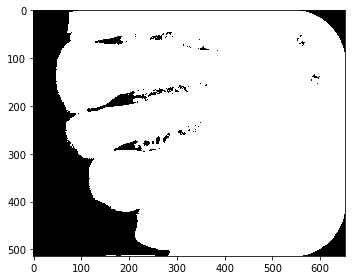

In [55]:
from skimage.filters import threshold_otsu
threshold_value = threshold_otsu(grayscale)  

crown_threholded = grayscale > threshold_value  

# Show the original image
io.imshow(grayscale)
plt.show()

# Show the thresholded image
io.imshow(crown_threholded)
plt.show()

### Edge Detection

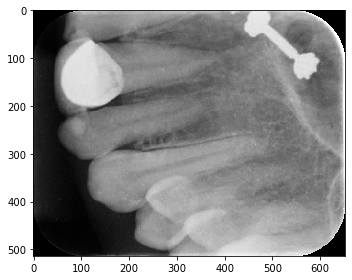

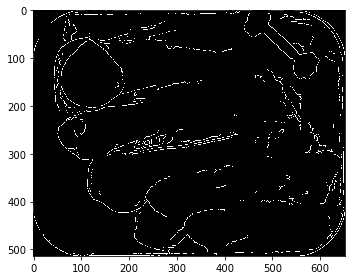

In [56]:
from skimage.feature import canny 
grayscale = color.rgb2gray(sample_img)
 
# Apply Canny detector 
crown_edges = canny(grayscale) 

io.imshow(grayscale)
plt.show()

io.imshow(crown_edges)
plt.show()